In [196]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [197]:
os.chdir('Data')
stats_data = pd.read_csv('Regular-Advanced.csv')
defense_data = pd.read_csv('Defensive.csv')
hustle_data = pd.read_csv('Hustle.csv')
shooting_data = pd.read_csv('Shooting.csv')
play_type_data = pd.read_csv('Play Type.csv')
passing_data = pd.read_csv('Passing.csv')

In [198]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca = PCA(.75, random_state = 0)

In [199]:
class PCA:

    def __init__(self, data):
        self.data = data
        self.PCA = pca.fit(self.Standard_Scaler_Preprocess().drop(['PLAYER', 'TEAM', 'POSITION'], axis = 1))
        
    def Standard_Scaler_Preprocess(self):    
        std_scale = StandardScaler()
        std_scale_data = std_scale.fit_transform(self.data.drop(['PLAYER', 'TEAM', 'POSITION'], axis = 1))
        std_scale_data = pd.DataFrame(std_scale_data, columns = self.data.drop(['PLAYER', 'TEAM', 'POSITION'], axis = 1).columns.tolist())
        std_scale_data['PLAYER'] = self.data['PLAYER']
        std_scale_data['TEAM'] = self.data['TEAM']
        std_scale_data['POSITION'] = self.data['POSITION']
        return std_scale_data
    
    def PCA_name(self):
        PCA_name = []
        for i in range(1, self.PCA.n_components_ + 1):
            PCA_name += ['PC' + str(i)]
        return PCA_name
    
    def PCA_variance(self):
        pca_variance = pd.DataFrame({"Variance Explained" : self.PCA.explained_variance_,
                                     'Percentage of Variance Explained' : self.PCA.explained_variance_ratio_}, index = self.PCA_name())
        pca_variance['Percentage of Variance Explained'] = (pca_variance['Percentage of Variance Explained'] * 100).round(0)
        pca_variance['Cumulative Percentage of Variance Explained'] = pca_variance['Percentage of Variance Explained'].cumsum()
        return pca_variance
    
    def PCA_transform(self):
        pca_data = pca.fit_transform(self.Standard_Scaler_Preprocess().drop(['PLAYER', 'TEAM', 'POSITION'], axis = 1))
        pca_data = pd.DataFrame(pca_data, columns = self.PCA_name())
        pca_data['PLAYER'] = self.Standard_Scaler_Preprocess()['PLAYER']
        pca_data['TEAM'] = self.Standard_Scaler_Preprocess()['TEAM']
        pca_data['POSITION'] = self.Standard_Scaler_Preprocess()['POSITION']
        return pca_data
    
    def Heatmap(self): 
        pca_eigen = pd.DataFrame(self.PCA.components_, columns = self.Standard_Scaler_Preprocess().drop(['PLAYER', 'TEAM', 'POSITION'], axis = 1).columns.tolist(), index = self.PCA_name()).T
        plt.figure(figsize = (10,10))
        sns.heatmap(pca_eigen.abs(), vmax = 0.5, vmin = 0)
        
    def PCA_sorted_eigen(self, PC):
        pca_eigen = pd.DataFrame(self.PCA.components_, columns = self.Standard_Scaler_Preprocess().drop(['PLAYER', 'TEAM', 'POSITION'], axis = 1).columns.tolist(), index = self.PCA_name()).T
        return pca_eigen.loc[pca_eigen[PC].abs().sort_values(ascending = False).index][PC]


In [200]:
def pca_name_change(df, name):
    for column in df.columns.tolist():
        if column[0:2] == 'PC':\
            df.rename({column : name + '_' + column}, axis = 1, inplace = True)
    return df

In [201]:
pca_df = pd.DataFrame()

# Stats

In [202]:
stats = PCA(stats_data)

In [203]:
stats.PCA_variance()

,Variance Explained,Percentage of Variance Explained,Cumulative Percentage of Variance Explained
PC1,6.029183,35.0,35.0
PC2,4.088027,24.0,59.0
PC3,1.564917,9.0,68.0
PC4,1.270074,7.0,75.0


In [204]:
stats_df = stats.PCA_transform()
stats_df.drop('PC4', axis = 1, inplace = True)

Consider only PC1, PC2 and PC3

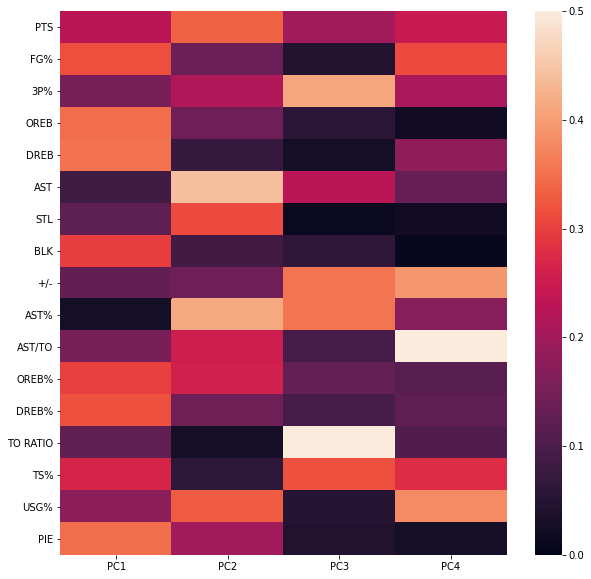

In [205]:
stats.Heatmap()

In [206]:
stats.PCA_sorted_eigen('PC1')

DREB        0.351989
PIE         0.347750
OREB        0.346513
DREB%       0.317017
FG%         0.315786
OREB%       0.301135
BLK         0.297099
TS%         0.265729
PTS         0.228893
USG%        0.174986
3P%        -0.154169
AST/TO     -0.153812
+/-         0.127050
TO RATIO    0.126544
STL         0.122212
AST         0.084436
AST%        0.025709
Name: PC1, dtype: float64

PC1 has a very high positive association with Rebounds, Efficiency, Field Goals, Blocks, Points and Usage.

In [207]:
stats.PCA_transform().nlargest(10, 'PC1')

,PC1,PC2,PC3,PC4,PLAYER,TEAM,POSITION
67,8.520841,-2.367678,-0.314011,1.756976,Rudy Gobert,UTA,C
50,8.499294,-1.685411,0.686365,-1.118225,Andre Drummond,DET,C
2,8.126167,3.767512,-0.602605,0.227876,Giannis Antetokounmpo,MIL,F
58,7.536460,-2.768259,-0.408303,1.334044,Clint Capela,HOU,C
3,7.534206,1.957477,-0.880680,-1.952717,Joel Embiid,PHI,F-C
9,7.280539,2.272972,-1.505980,-0.670016,Anthony Davis,NOP,F-C
141,7.195520,-3.006260,2.915922,0.335554,DeAndre Jordan,NYK,C
14,6.828087,0.972451,-0.517403,-1.675881,Karl-Anthony Towns,MIN,C
116,6.790393,-3.034265,0.391789,-0.805244,Hassan Whiteside,MIA,C
70,5.916381,-0.318076,0.906864,0.411981,Jusuf Nurkic,POR,C


In [208]:
stats.PCA_sorted_eigen('PC2')

AST         0.441883
AST%        0.415633
PTS         0.334448
USG%        0.328151
STL         0.312165
OREB%      -0.261523
AST/TO      0.252449
3P%         0.216458
PIE         0.200151
+/-         0.141904
OREB       -0.141182
DREB%      -0.140495
FG%        -0.136768
BLK        -0.086800
DREB        0.072805
TS%        -0.060431
TO RATIO   -0.031044
Name: PC2, dtype: float64

PC2 has a very high positive association with Assists, Points, Usage, Steals, 3Points and Efficiency.

In [209]:
stats.PCA_transform().nlargest(10, 'PC2')

,PC1,PC2,PC3,PC4,PLAYER,TEAM,POSITION
0,4.674833,7.289013,-0.240604,-1.506443,James Harden,HOU,G
18,4.378281,6.589847,2.311902,-0.471951,Russell Westbrook,OKC,G
4,4.158587,5.603268,0.412803,-0.238377,LeBron James,LAL,F
71,0.922985,5.499303,0.914195,1.727263,Chris Paul,HOU,G
15,2.230898,5.142556,-0.741907,0.940791,Kyrie Irving,BOS,G
25,0.756852,5.082894,1.055244,-0.491862,D'Angelo Russell,BKN,G
29,0.861245,5.033422,2.380733,-0.706188,John Wall,WAS,G
10,1.696719,4.942474,-1.023795,0.754508,Damian Lillard,POR,G
26,0.325086,4.845477,-0.265404,0.973629,Mike Conley,MEM,G
85,0.663416,4.579681,0.729358,2.197559,Kyle Lowry,TOR,G


In [210]:
stats.PCA_sorted_eigen('PC3')

TO RATIO    0.579532
3P%        -0.411569
+/-        -0.355234
AST%        0.354505
TS%        -0.318100
AST         0.229776
PTS        -0.200372
OREB%       0.130471
DREB%       0.093569
AST/TO      0.090267
BLK        -0.062795
OREB        0.058106
USG%       -0.050312
FG%        -0.046110
PIE        -0.043579
DREB       -0.027225
STL         0.014547
Name: PC3, dtype: float64

PC3 has a very high positive association with TO Ratio and Assist % and high negative association with 3 Points, +/-, Treu Shooting % and Points

In [211]:
stats.PCA_transform().nlargest(10, 'PC3')

,PC1,PC2,PC3,PC4,PLAYER,TEAM,POSITION
190,-0.697074,3.262883,3.646403,-0.060520,Rajon Rondo,LAL,G
370,0.769264,-2.534877,3.234830,0.664361,Zaza Pachulia,DET,C
379,2.664652,-4.466974,3.165894,1.360402,Tyson Chandler,LAL,C
343,2.121457,-3.279152,3.151859,0.355395,Marcin Gortat,LAC,C
54,4.564145,2.474482,3.125753,1.639613,Ben Simmons,PHI,G-F
385,-3.742556,-0.055890,3.066285,1.043284,Jose Calderon,DET,G
141,7.195520,-3.006260,2.915922,0.335554,DeAndre Jordan,NYK,C
340,-1.710347,0.617600,2.909200,-0.400528,De'Anthony Melton,PHX,G
375,2.069184,-3.330097,2.772393,0.452388,Andrew Bogut,GSW,C
153,0.076652,2.669626,2.767736,0.722823,Elfrid Payton,NOP,G


In [212]:
stats_data.nlargest(10, '')

KeyError: &#39;&#39;

PC1 does a good job in sitinguishing between Centrers and Non-Centers. PC2 does a good job in distinguishing Star player from ordinary players. PC3 may indicate playmaking or lack of 3 point shooting.

In [104]:
stats_df = pca_name_change(stats_df, 'stats')

# Defense

In [105]:
defense = PCA(defense_data)

In [106]:
defense.PCA_variance()

,Variance Explained,Percentage of Variance Explained,Cumulative Percentage of Variance Explained
PC1,4.210922,28.0,28.0
PC2,2.543977,17.0,45.0
PC3,1.742423,12.0,57.0
PC4,1.433578,10.0,67.0
PC5,1.290620,9.0,76.0
PC6,0.906234,6.0,82.0


Consider PC1, PC2, PC3 and PC4

In [107]:
defense_df = defense.PCA_transform()
defense_df.drop(['PC5', 'PC6'], axis = 1, inplace = True)

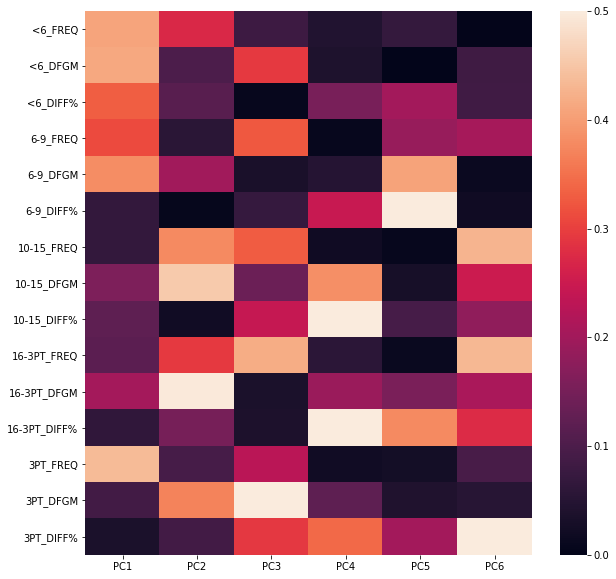

In [108]:
defense.Heatmap()

In [109]:
defense.PCA_sorted_eigen('PC1')

3PT_FREQ       -0.437319
&lt;6_DFGM         0.413095
&lt;6_FREQ         0.409989
6-9_DFGM        0.381542
&lt;6_DIFF%       -0.330681
6-9_FREQ        0.311419
16-3PT_DFGM     0.204031
10-15_DFGM      0.159255
10-15_DIFF%    -0.122827
16-3PT_FREQ    -0.117917
3PT_DFGM       -0.086650
10-15_FREQ     -0.068088
6-9_DIFF%      -0.067350
16-3PT_DIFF%    0.064154
3PT_DIFF%      -0.036481
Name: PC1, dtype: float64

PC1 has high positive association with defensive impact close to the basket and high negative impact far from the basket.

In [110]:
defense.PCA_transform().nlargest(10, 'PC1')

,PC1,PC2,PC3,PC4,PC5,PC6,PLAYER,TEAM,POSITION
67,6.743787,2.980643,0.176815,-0.002579,0.005497,0.136966,Rudy Gobert,UTA,C
28,5.991841,1.825117,0.368791,1.072025,-1.097752,0.206563,Nikola Vucevic,ORL,C
72,5.850548,-0.922208,2.025494,-1.052427,-0.876619,-0.143008,Jonas Valanciunas,MEM,C
145,5.583363,2.572548,0.695289,-0.275029,-0.121762,-0.006222,Jarrett Allen,BKN,C
104,5.330384,-1.231769,-1.259088,-0.205148,1.038150,-0.495596,Myles Turner,IND,C-F
58,5.110977,2.642163,-0.716797,0.834808,-0.837307,-0.482389,Clint Capela,HOU,C
14,5.091028,1.427040,-1.069885,0.660448,-0.565662,0.106390,Karl-Anthony Towns,MIN,C
3,5.025456,2.818697,-1.269017,1.760690,1.255859,-0.054580,Joel Embiid,PHI,F-C
70,4.982291,0.062812,0.474919,-0.658419,0.337801,-0.219073,Jusuf Nurkic,POR,C
62,4.890774,1.836787,-0.628039,-0.400775,-0.494228,0.255803,Deandre Ayton,PHX,C


In [111]:
defense.PCA_sorted_eigen('PC2')

16-3PT_DFGM     0.496275
10-15_DFGM      0.455986
10-15_FREQ      0.377792
3PT_DFGM        0.370452
16-3PT_FREQ     0.293875
&lt;6_FREQ        -0.271864
6-9_DFGM        0.199603
16-3PT_DIFF%    0.150501
&lt;6_DIFF%        0.114474
&lt;6_DFGM         0.100099
3PT_FREQ        0.093617
3PT_DIFF%       0.086145
6-9_FREQ       -0.056198
10-15_DIFF%    -0.023187
6-9_DIFF%       0.007555
Name: PC2, dtype: float64

PC2 has high positive association with defensive impact far from the basket

In [112]:
defense.PCA_transform().nlargest(10, 'PC2')

,PC1,PC2,PC3,PC4,PC5,PC6,PLAYER,TEAM,POSITION
69,-0.363988,5.700290,2.378964,1.610859,0.707493,-1.296531,Malcolm Brogdon,MIL,G
60,-0.818284,4.129453,-0.312681,0.450831,0.865570,-0.462785,Josh Richardson,MIA,G-F
27,-0.007383,4.127109,2.641848,1.431429,-0.825103,-0.164258,CJ McCollum,POR,G
170,0.518684,3.870235,0.354600,0.229410,-0.763352,-0.857891,Derrick White,SAS,G
66,-1.158727,3.840695,1.377906,-0.455513,-1.281873,-1.009888,Eric Bledsoe,MIL,G
115,4.744032,3.753928,-0.455359,0.811112,-0.098588,0.077981,Brook Lopez,MIL,C
128,-2.664733,3.641396,1.475279,-0.838245,-0.633492,-0.499958,D.J. Augustin,ORL,G
56,-1.032125,3.372740,1.920451,-0.017030,0.459810,1.718039,Spencer Dinwiddie,BKN,G
110,0.642864,3.318046,1.094224,0.092596,-1.179487,0.867882,Ricky Rubio,UTA,G
78,0.338256,3.312205,1.115822,-0.233750,-0.582298,-0.331939,Evan Fournier,ORL,G-F


In [113]:
defense.PCA_sorted_eigen('PC3')

3PT_DFGM       -0.541970
16-3PT_FREQ     0.418444
10-15_FREQ      0.328420
6-9_FREQ        0.325236
&lt;6_DFGM        -0.294101
3PT_DIFF%      -0.291178
10-15_DIFF%     0.242738
3PT_FREQ       -0.229652
10-15_DFGM      0.137856
&lt;6_FREQ        -0.081081
6-9_DIFF%       0.070583
16-3PT_DIFF%   -0.037442
16-3PT_DFGM    -0.036663
6-9_DFGM       -0.034788
&lt;6_DIFF%       -0.008789
Name: PC3, dtype: float64

In [114]:
defense.PCA_transform().nlargest(10, 'PC3')

,PC1,PC2,PC3,PC4,PC5,PC6,PLAYER,TEAM,POSITION
220,-3.272594,-1.176863,4.542534,0.204517,1.781478,-1.017258,Isaiah Thomas,DEN,G
375,1.889825,-0.623276,4.337137,0.330227,0.190763,5.450042,Andrew Bogut,GSW,C
387,1.022081,0.179674,4.173084,-2.983107,3.618439,0.575740,Quincy Acy,PHX,F
369,3.597103,-1.362126,3.870692,-1.764813,-0.754256,-0.922125,Pau Gasol,MIL,C-F
286,-0.851651,2.139802,3.542123,-0.670882,-0.246505,-0.525007,T.J. McConnell,PHI,G
327,-0.865854,0.074508,3.027091,1.232176,-0.457235,-1.024255,Raul Neto,UTA,G
224,-3.218115,1.257569,2.741819,-0.441695,-0.915154,0.224201,Seth Curry,POR,G
312,3.846907,0.432367,2.655124,0.884360,-0.007025,-0.907000,Ed Davis,BKN,C
27,-0.007383,4.127109,2.641848,1.431429,-0.825103,-0.164258,CJ McCollum,POR,G
307,-0.694520,-0.251525,2.459972,0.695723,-0.297154,0.996727,Matthew Dellavedova,CLE,G


In [115]:
defense.PCA_sorted_eigen('PC4')

10-15_DIFF%     0.577434
16-3PT_DIFF%   -0.505918
10-15_DFGM      0.383513
3PT_DIFF%       0.342415
6-9_DIFF%      -0.244888
16-3PT_DFGM    -0.192159
&lt;6_DIFF%       -0.154122
3PT_DFGM        0.122983
16-3PT_FREQ    -0.058344
6-9_DFGM       -0.049567
&lt;6_FREQ         0.044505
&lt;6_DFGM         0.040496
3PT_FREQ       -0.022732
10-15_FREQ     -0.020667
6-9_FREQ        0.009344
Name: PC4, dtype: float64

PC4 has high positive association with 

In [116]:
defense.PCA_transform().nlargest(10, 'PC4')

,PC1,PC2,PC3,PC4,PC5,PC6,PLAYER,TEAM,POSITION
381,-0.014371,-4.656046,1.046044,3.897411,-2.128391,-1.387181,Gary Clark,HOU,F
246,-2.367337,-2.349579,-0.577529,3.651942,-0.273595,1.699509,Antonio Blakeney,CHI,G
365,1.400301,-2.632694,0.937168,3.217716,-2.352480,0.265298,Ian Mahinmi,WAS,C
354,-1.934916,-4.236224,-0.886498,2.959770,-2.561778,-1.242879,John Jenkins,NYK,G
303,-1.835249,-3.322452,-2.377018,2.920178,2.849915,0.662159,Jordan McRae,WAS,G
284,-2.525680,-1.605340,0.776028,2.774183,3.605019,0.864847,CJ Miles,MEM,F-G
242,-1.528455,-2.253812,-0.691266,2.772268,1.228708,1.162636,Vince Carter,ATL,F-G
153,-0.378834,2.492004,-0.527229,2.563061,-1.096635,-2.500277,Elfrid Payton,NOP,G
355,-1.570273,-0.970146,0.722715,2.470840,-3.043731,-0.203982,Timothe Luwawu-Cabarrot,CHI,G-F
336,1.953359,-3.464952,0.536832,2.175019,0.848325,0.820391,Thon Maker,DET,F


In [117]:
defense_df = pca_name_change(defense_df, 'defense')

# Hustle

In [118]:
hustle = PCA(hustle_data)

In [119]:
hustle.PCA_variance()

,Variance Explained,Percentage of Variance Explained,Cumulative Percentage of Variance Explained
PC1,2.422463,40.0,40.0
PC2,1.753256,29.0,69.0
PC3,0.975202,16.0,85.0


In [120]:
hustle_df = hustle.PCA_transform()

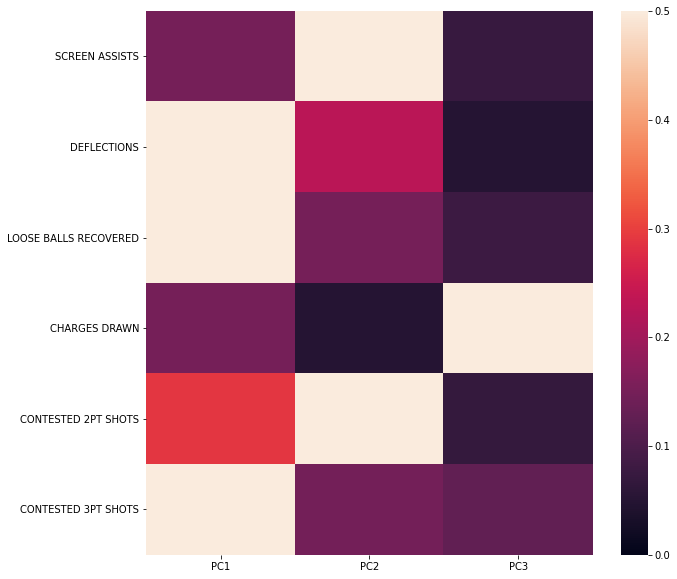

In [121]:
hustle.Heatmap()

In [122]:
hustle.PCA_sorted_eigen('PC1')

LOOSE BALLS RECOVERED    0.570565
DEFLECTIONS              0.527616
CONTESTED 3PT SHOTS      0.517445
CONTESTED 2PT SHOTS      0.289343
SCREEN ASSISTS           0.150110
CHARGES DRAWN            0.148578
Name: PC1, dtype: float64

PC1 has high postive association with Loose balls recovered, defelctions and contested 3 point shots.

In [123]:
hustle.PCA_transform().nlargest(10, 'PC1')

,PC1,PC2,PC3,PLAYER,TEAM,POSITION
1,5.128085,-1.731422,-0.676752,Paul George,OKC,F
37,4.655636,-2.160353,2.944387,Victor Oladipo,IND,G
243,4.095092,0.468817,0.852105,Draymond Green,GSW,F
9,4.056470,2.019982,0.279794,Anthony Davis,NOP,F-C
111,3.990814,-0.677960,2.187235,Thaddeus Young,IND,F
24,3.758310,-1.245306,-0.885952,Jrue Holiday,NOP,G
63,3.713975,1.543815,3.417432,DeMarcus Cousins,GSW,C
91,3.669803,2.754296,-1.058368,Steven Adams,OKC,C
50,3.450611,2.840533,-0.798752,Andre Drummond,DET,C
12,3.397581,-1.595313,0.614667,Bradley Beal,WAS,G


In [124]:
hustle.PCA_sorted_eigen('PC2')

SCREEN ASSISTS           0.701515
CONTESTED 2PT SHOTS      0.639120
DEFLECTIONS             -0.230166
LOOSE BALLS RECOVERED   -0.150172
CONTESTED 3PT SHOTS     -0.146578
CHARGES DRAWN           -0.048873
Name: PC2, dtype: float64

PC2 has high positive associations with Screen assists and Contested 2 point shots

In [125]:
hustle.PCA_transform().nlargest(10, 'PC2')

,PC1,PC2,PC3,PLAYER,TEAM,POSITION
67,1.828664,5.952499,0.050169,Rudy Gobert,UTA,C
145,1.034489,5.510421,-0.558286,Jarrett Allen,BKN,C
70,1.945697,4.437992,-0.593789,Jusuf Nurkic,POR,C
21,1.317888,4.181208,-0.641535,LaMarcus Aldridge,SAS,C-F
28,1.050215,3.810555,-0.473890,Nikola Vucevic,ORL,C
165,1.312765,3.750158,0.519421,Cody Zeller,CHA,C
115,1.808938,3.745998,-1.061058,Brook Lopez,MIL,C
3,2.297080,3.523683,-0.555207,Joel Embiid,PHI,F-C
72,-0.335086,3.470294,-0.431314,Jonas Valanciunas,MEM,C
179,-0.949006,3.466573,-0.323722,Robin Lopez,CHI,C


In [126]:
hustle.PCA_sorted_eigen('PC3')

CHARGES DRAWN            0.982432
CONTESTED 3PT SHOTS     -0.126788
LOOSE BALLS RECOVERED   -0.078343
SCREEN ASSISTS           0.072434
CONTESTED 2PT SHOTS     -0.069836
DEFLECTIONS             -0.049901
Name: PC3, dtype: float64

PC3 has very high positive association with charges drawn.

In [127]:
hustle.PCA_transform().nlargest(10, 'PC3')

,PC1,PC2,PC3,PLAYER,TEAM,POSITION
270,0.336447,-0.038986,8.259405,Ersan Ilyasova,MIL,F
387,-1.607527,0.628820,4.532303,Quincy Acy,PHX,F
52,-0.326956,0.422254,4.428631,Kevin Love,CLE,F-C
13,2.511788,0.278590,3.953567,Blake Griffin,DET,F
322,-0.831873,2.498067,3.929072,Aron Baynes,BOS,C-F
101,1.183689,2.223721,3.533810,Marc Gasol,TOR,C
63,3.713975,1.543815,3.417432,DeMarcus Cousins,GSW,C
85,2.538592,-1.355712,3.276272,Kyle Lowry,TOR,G
375,-2.254635,1.702032,3.154464,Andrew Bogut,GSW,C
37,4.655636,-2.160353,2.944387,Victor Oladipo,IND,G


PC1 indicates player hustle by perimeter player, PC2 indicates player hustle made by centers and PC3 indicates players who draw a lot of charges.

In [128]:
hustle_df = pca_name_change(hustle_df, 'hustle')

# Shooting

In [129]:
shooting = PCA(shooting_data)

In [130]:
shooting.PCA_variance()

,Variance Explained,Percentage of Variance Explained,Cumulative Percentage of Variance Explained
PC1,3.450025,29.0,29.0
PC2,2.310551,19.0,48.0
PC3,1.025638,9.0,57.0
PC4,0.928754,8.0,65.0
PC5,0.917629,8.0,73.0
PC6,0.835433,7.0,80.0


Consider PC1, PC2, PC3 and PC4

In [131]:
shooting_df = shooting.PCA_transform()
shooting_df.drop(['PC5', 'PC6'], axis = 1, inplace = True)

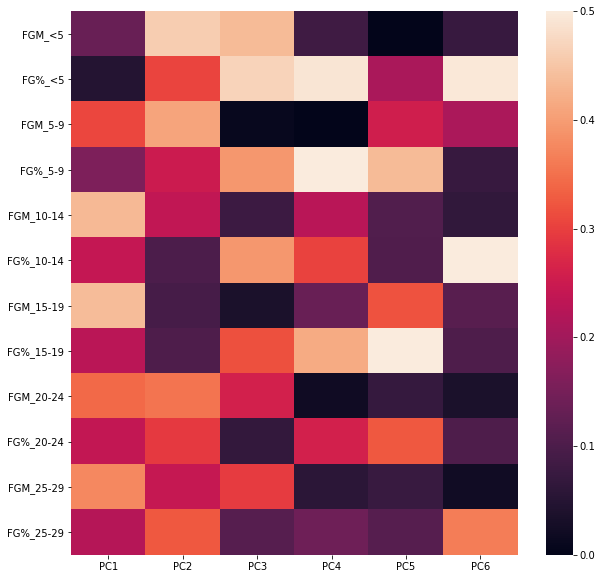

In [132]:
shooting.Heatmap()

In [133]:
shooting.PCA_sorted_eigen('PC1')

FGM_15-19    0.439157
FGM_10-14    0.435463
FGM_25-29    0.376169
FGM_20-24    0.342705
FGM_5-9      0.307155
FG%_10-14    0.241552
FG%_20-24    0.239387
FG%_15-19    0.230155
FG%_25-29    0.224493
FG%_5-9      0.158824
FGM_&lt;5       0.133178
FG%_&lt;5      -0.047289
Name: PC1, dtype: float64

In [134]:
shooting.PCA_transform().nlargest(10, 'PC1')

,PC1,PC2,PC3,PC4,PC5,PC6,PLAYER,TEAM,POSITION
8,6.213172,2.941214,0.346670,-0.318626,-2.483504,-0.198083,Kevin Durant,GSW,F
19,5.354937,-0.679565,-1.356352,-0.368545,-1.368742,-0.465745,Klay Thompson,GSW,G
25,5.331598,0.590458,0.353450,-1.268879,0.100220,0.784183,D'Angelo Russell,BKN,G
7,5.250847,2.198081,0.236640,-0.735279,-0.433954,0.487783,Devin Booker,PHX,G
27,5.108914,0.256371,0.369722,-0.894257,-0.749576,0.663517,CJ McCollum,POR,G
6,5.085654,2.050734,-0.585712,-0.308251,-0.595673,0.317474,Kawhi Leonard,TOR,F
15,4.950763,0.636243,-0.590088,-0.804644,-0.438857,-0.075430,Kyrie Irving,BOS,G
5,4.648575,-2.554607,-2.278768,0.513325,0.744198,-0.141972,Stephen Curry,GSW,G
21,4.484654,4.011999,0.356056,-0.425208,-0.524871,0.877896,LaMarcus Aldridge,SAS,C-F
1,4.416718,-1.115199,-1.817118,-0.525678,0.046111,0.451766,Paul George,OKC,F


In [135]:
shooting.PCA_sorted_eigen('PC2')

FGM_&lt;5       0.460555
FGM_5-9      0.409421
FGM_20-24   -0.355007
FG%_25-29   -0.324504
FG%_&lt;5       0.306442
FG%_20-24   -0.294842
FG%_5-9      0.251863
FGM_25-29   -0.243678
FGM_10-14    0.236933
FG%_15-19   -0.103052
FG%_10-14    0.099986
FGM_15-19    0.092325
Name: PC2, dtype: float64

In [136]:
shooting.PCA_transform().nlargest(10, 'PC2')

,PC1,PC2,PC3,PC4,PC5,PC6,PLAYER,TEAM,POSITION
91,-1.629511,5.118348,0.029979,-1.631147,1.332864,-0.046190,Steven Adams,OKC,C
22,4.309916,4.933324,0.794408,-1.136897,-1.279228,1.645091,DeMar DeRozan,SAS,G
62,0.828138,4.680582,0.131475,0.259813,-0.362062,0.782571,Deandre Ayton,PHX,C
58,-3.610516,4.257615,-2.826299,-0.736764,-0.098399,1.740925,Clint Capela,HOU,C
21,4.484654,4.011999,0.356056,-0.425208,-0.524871,0.877896,LaMarcus Aldridge,SAS,C-F
245,-2.343839,3.746821,2.094998,-1.086704,1.358920,-3.578216,Mitchell Robinson,NYK,C
50,-1.841450,3.614808,-1.174611,-1.042250,0.840758,0.744670,Andre Drummond,DET,C
67,-3.434503,3.596777,-1.828781,-0.507428,-1.064534,0.891206,Rudy Gobert,UTA,C
28,3.864671,3.413655,-0.579068,0.606231,0.980187,0.875409,Nikola Vucevic,ORL,C
2,0.303794,3.404961,-2.447429,-0.232322,-1.056779,-0.519224,Giannis Antetokounmpo,MIL,F


In [137]:
shooting.PCA_sorted_eigen('PC3')

FG%_&lt;5      -0.467139
FGM_&lt;5      -0.435913
FG%_10-14    0.394311
FG%_5-9      0.393065
FG%_15-19    0.318194
FGM_25-29   -0.296855
FGM_20-24   -0.260234
FG%_25-29   -0.111750
FGM_10-14    0.079365
FG%_20-24   -0.066872
FGM_15-19    0.036123
FGM_5-9     -0.011144
Name: PC3, dtype: float64

In [138]:
shooting.PCA_transform().nlargest(10, 'PC3')

,PC1,PC2,PC3,PC4,PC5,PC6,PLAYER,TEAM,POSITION
385,-0.436190,0.070298,4.154690,2.666433,1.342515,1.538755,Jose Calderon,DET,G
292,0.739725,-1.829775,2.720935,0.355313,1.672703,0.027865,Troy Daniels,PHX,G
366,-1.620298,2.564547,2.625281,-0.019698,-1.172283,0.298374,Shaun Livingston,GSW,G
325,-2.080283,3.034541,2.494485,5.210408,-2.316090,2.064721,Damian Jones,GSW,C
339,0.059585,-1.766005,2.285760,-1.941932,3.050063,-1.424567,Cameron Reynolds,MIN,G
386,-1.334901,0.168983,2.283842,0.886354,-1.024146,0.146499,Julian Washburn,MEM,F-G
367,-0.481015,-0.250538,2.126551,0.870200,0.297386,0.568206,Courtney Lee,DAL,G
245,-2.343839,3.746821,2.094998,-1.086704,1.358920,-3.578216,Mitchell Robinson,NYK,C
263,-0.276728,-0.230225,1.956844,0.477186,0.316977,0.454913,Stanley Johnson,NOP,F
180,1.138905,1.069076,1.873381,-0.859277,-0.078563,-0.474385,Tony Parker,CHA,G


In [139]:
shooting.PCA_sorted_eigen('PC4')

FG%_5-9      0.569821
FG%_&lt;5       0.491576
FG%_15-19    0.417119
FG%_10-14   -0.302832
FG%_20-24    0.260030
FGM_10-14   -0.227273
FG%_25-29    0.141099
FGM_15-19   -0.134112
FGM_&lt;5      -0.083855
FGM_25-29   -0.057821
FGM_20-24    0.020545
FGM_5-9     -0.000938
Name: PC4, dtype: float64

In [140]:
shooting.PCA_transform().nlargest(10, 'PC4')

,PC1,PC2,PC3,PC4,PC5,PC6,PLAYER,TEAM,POSITION
325,-2.080283,3.034541,2.494485,5.210408,-2.316090,2.064721,Damian Jones,GSW,C
184,0.079414,-2.515107,-0.609749,3.107341,-2.482117,1.295534,Danuel House Jr.,HOU,F-G
261,-1.194556,-0.376390,-0.502263,2.868067,-1.110410,1.072045,Pat Connaughton,MIL,G
385,-0.436190,0.070298,4.154690,2.666433,1.342515,1.538755,Jose Calderon,DET,G
324,-0.493843,0.184418,0.865778,2.302298,1.134837,0.133723,Jakob Poeltl,SAS,C
298,0.601523,0.365098,0.790632,2.194125,-0.062315,-3.152926,Cheick Diallo,NOP,F
167,-0.121212,-0.412034,-0.181865,2.020207,0.181621,-0.055867,Kelly Olynyk,MIA,F
189,0.159201,-1.504273,-0.801528,1.993021,0.149026,0.048744,Gerald Green,HOU,G-F
213,-0.557529,-2.510745,-0.281639,1.986692,-2.937573,1.740181,Bruno Caboclo,MEM,F
205,-0.724125,-0.676471,-0.302916,1.940715,1.203733,1.064551,Norman Powell,TOR,F-G


In [146]:
shooting_df = pca_name_change(shooting_df, 'shooting')

# Play Type

In [147]:
play_type = PCA(play_type_data)

In [148]:
play_type.PCA_variance()

,Variance Explained,Percentage of Variance Explained,Cumulative Percentage of Variance Explained
PC1,9.614853,32.0,32.0
PC2,4.825864,16.0,48.0
PC3,2.752843,9.0,57.0
PC4,1.959983,7.0,64.0
PC5,1.840808,6.0,70.0
PC6,1.367442,5.0,75.0
PC7,0.965695,3.0,78.0


Consider PC1, PC2, PC3 and PC4

In [149]:
play_df = play_type.PCA_transform()
play_df.drop(['PC5', 'PC6', 'PC7'], axis = 1, inplace = True)

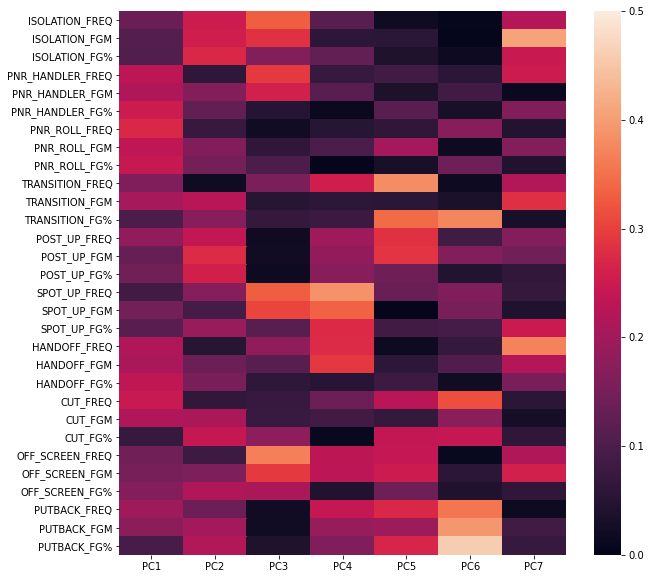

In [150]:
play_type.Heatmap()

In [151]:
play_type.PCA_sorted_eigen('PC1')

PNR_ROLL_FREQ       0.272504
PNR_HANDLER_FG%    -0.250341
CUT_FREQ            0.246880
PNR_ROLL_FG%        0.244720
PNR_ROLL_FGM        0.235965
HANDOFF_FG%        -0.235376
PNR_HANDLER_FREQ   -0.233919
HANDOFF_FREQ       -0.217812
CUT_FGM             0.216730
PNR_HANDLER_FGM    -0.215967
HANDOFF_FGM        -0.211510
TRANSITION_FGM     -0.205119
PUTBACK_FREQ        0.195974
POST_UP_FREQ        0.183592
PUTBACK_FGM         0.177282
OFF_SCREEN_FG%     -0.167743
TRANSITION_FREQ    -0.161883
OFF_SCREEN_FGM     -0.150660
SPOT_UP_FGM        -0.147358
OFF_SCREEN_FREQ    -0.145690
POST_UP_FG%         0.144187
ISOLATION_FREQ     -0.134870
POST_UP_FGM         0.131579
SPOT_UP_FG%        -0.115224
ISOLATION_FGM      -0.111002
ISOLATION_FG%      -0.107111
TRANSITION_FG%      0.101224
PUTBACK_FG%         0.094074
SPOT_UP_FREQ       -0.086632
CUT_FG%             0.071273
Name: PC1, dtype: float64

PC1 have high positive associations with Pick and Roll Rollong Offense and Cuts, and high negative asociation with Pick and Roll Handling offense and Handoffs.

In [152]:
play_type.PCA_transform().nlargest(10, 'PC1')

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PLAYER,TEAM,POSITION
58,7.600965,1.721530,-0.073903,3.423776,-2.536280,-0.045427,1.077073,Clint Capela,HOU,C
91,7.460323,2.169114,0.600353,2.141442,0.010475,-1.173214,0.070619,Steven Adams,OKC,C
62,7.423871,4.167748,0.636532,0.803604,0.213403,-2.029204,-1.577586,Deandre Ayton,PHX,C
197,7.421921,1.418879,0.584205,3.402349,-1.403547,-1.579631,0.392756,Ivica Zubac,LAC,C
245,7.119721,1.105347,0.620788,3.693056,-2.333820,-1.894983,1.112892,Mitchell Robinson,NYK,C
67,7.039850,2.109109,-0.227898,2.244205,-2.251520,0.039923,-0.387717,Rudy Gobert,UTA,C
88,6.999259,2.275179,-0.224566,0.755172,-0.024413,0.004640,-1.218363,Domantas Sabonis,IND,F
145,6.983202,0.447097,-0.101956,3.472017,-2.017824,-0.352789,0.291930,Jarrett Allen,BKN,C
50,6.953393,3.661278,0.616844,1.730152,-0.947177,-2.713341,-0.790523,Andre Drummond,DET,C
72,6.870029,4.056347,0.642745,0.437548,1.731891,-2.946524,-1.098263,Jonas Valanciunas,MEM,C


In [153]:
play_type.PCA_sorted_eigen('PC2')

POST_UP_FGM         0.276550
ISOLATION_FG%       0.272294
POST_UP_FG%         0.259629
ISOLATION_FGM       0.257288
ISOLATION_FREQ      0.250575
CUT_FG%             0.243260
POST_UP_FREQ        0.238906
TRANSITION_FGM      0.228250
PUTBACK_FG%         0.219253
OFF_SCREEN_FG%      0.215637
CUT_FGM             0.210961
PUTBACK_FGM         0.202252
SPOT_UP_FG%         0.190385
TRANSITION_FG%      0.171331
SPOT_UP_FREQ       -0.168608
PNR_HANDLER_FGM     0.166552
PNR_ROLL_FGM        0.164056
OFF_SCREEN_FGM      0.159431
HANDOFF_FG%         0.153822
PNR_ROLL_FG%        0.148610
HANDOFF_FGM         0.137024
PUTBACK_FREQ        0.136934
PNR_HANDLER_FG%     0.125267
SPOT_UP_FGM         0.091006
OFF_SCREEN_FREQ     0.080620
PNR_ROLL_FREQ       0.073011
CUT_FREQ            0.066059
PNR_HANDLER_FREQ    0.064049
HANDOFF_FREQ        0.051919
TRANSITION_FREQ     0.017685
Name: PC2, dtype: float64

PC2 has positive association with all forms of offense except spot-up shots

In [154]:
play_type.PCA_transform().nlargest(10, 'PC2')

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PLAYER,TEAM,POSITION
0,-4.313970,7.210947,7.787175,-0.991071,0.170911,-0.035282,6.920651,James Harden,HOU,G
3,3.201982,5.586363,-0.428772,-1.627686,2.190359,-2.569226,-0.949505,Joel Embiid,PHI,F-C
21,6.429272,5.522882,0.174194,-1.758106,4.178521,-2.475544,-2.434449,LaMarcus Aldridge,SAS,C-F
2,0.195494,5.351138,0.568888,-1.022542,-1.262108,-0.933241,1.398558,Giannis Antetokounmpo,MIL,F
13,1.029600,5.160886,1.872396,-1.523751,2.392758,-1.104051,-1.045371,Blake Griffin,DET,F
4,-1.127836,5.025539,2.697098,-0.559131,-0.770095,-0.142302,2.004907,LeBron James,LAL,F
14,4.327973,4.787503,-0.119695,-1.819967,2.901757,-2.641468,-0.532577,Karl-Anthony Towns,MIN,C
28,5.842165,4.720024,-1.026320,-1.198491,2.615616,-2.070375,-1.929092,Nikola Vucevic,ORL,C
31,3.346471,4.661670,-0.720643,-0.596504,2.495493,-1.887823,-1.355560,Nikola Jokic,DEN,C
8,-2.155861,4.393684,0.619997,-0.927910,1.217922,1.385536,1.548226,Kevin Durant,GSW,F


In [155]:
play_type.PCA_sorted_eigen('PC3')

OFF_SCREEN_FREQ    -0.365758
ISOLATION_FREQ      0.331855
SPOT_UP_FREQ       -0.330286
SPOT_UP_FGM        -0.305514
OFF_SCREEN_FGM     -0.294832
PNR_HANDLER_FREQ    0.293776
ISOLATION_FGM       0.284412
PNR_HANDLER_FGM     0.261217
OFF_SCREEN_FG%     -0.212017
HANDOFF_FREQ       -0.181181
CUT_FG%            -0.179337
ISOLATION_FG%       0.164113
TRANSITION_FREQ    -0.156229
HANDOFF_FGM        -0.115557
SPOT_UP_FG%        -0.115327
PNR_ROLL_FG%       -0.101488
CUT_FGM            -0.074532
CUT_FREQ           -0.073767
TRANSITION_FG%     -0.068994
PNR_ROLL_FGM       -0.063800
HANDOFF_FG%        -0.061895
TRANSITION_FGM     -0.051822
PNR_HANDLER_FG%     0.050372
PUTBACK_FG%        -0.039115
POST_UP_FGM         0.023154
PUTBACK_FREQ       -0.022638
PUTBACK_FGM        -0.022153
PNR_ROLL_FREQ      -0.021656
POST_UP_FREQ        0.020299
POST_UP_FG%         0.015649
Name: PC3, dtype: float64

PC3 has high postive association with Isolations and Pick and Roll Handling, and has high negative association with Off Screen shots and Post ups

In [156]:
play_type.PCA_transform().nlargest(10, 'PC3')

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PLAYER,TEAM,POSITION
0,-4.313970,7.210947,7.787175,-0.991071,0.170911,-0.035282,6.920651,James Harden,HOU,G
71,-2.709055,1.740370,5.477338,-0.579710,1.153581,0.251675,1.174187,Chris Paul,HOU,G
29,-3.254109,1.424733,4.329504,-2.345069,0.056871,-0.464004,2.624064,John Wall,WAS,G
119,-2.731093,-0.428541,3.538250,-0.382811,-0.466259,0.299365,-0.028889,Jeff Teague,MIN,G
180,-2.589831,-0.892134,3.364047,0.183872,-0.321275,0.435259,-1.517393,Tony Parker,CHA,G
99,-3.440671,-0.209773,3.258644,0.034195,-0.342233,0.025914,0.220879,Dennis Smith Jr.,NYK,G
56,-3.367519,1.144691,3.216302,-0.034348,0.265354,-0.946212,0.934708,Spencer Dinwiddie,BKN,G
190,-1.774402,-0.699973,3.162627,-0.641413,-0.451787,0.255896,0.455431,Rajon Rondo,LAL,G
136,-2.446074,-0.117549,2.967726,-0.494570,0.311754,0.103421,-1.142105,Kris Dunn,CHI,G
18,-3.035367,3.770840,2.962601,-2.307546,0.415970,-0.030361,2.790367,Russell Westbrook,OKC,G


In [157]:
play_type.PCA_sorted_eigen('PC4')

SPOT_UP_FREQ       -0.388628
SPOT_UP_FGM        -0.334762
HANDOFF_FGM         0.291089
HANDOFF_FREQ        0.275659
SPOT_UP_FG%        -0.274726
TRANSITION_FREQ    -0.256028
PUTBACK_FREQ        0.243795
OFF_SCREEN_FREQ     0.233749
OFF_SCREEN_FGM      0.232357
POST_UP_FREQ       -0.195668
PUTBACK_FGM         0.189436
POST_UP_FGM        -0.182698
POST_UP_FG%        -0.171347
PUTBACK_FG%         0.161298
CUT_FREQ            0.137626
ISOLATION_FG%      -0.126064
PNR_HANDLER_FGM     0.115013
ISOLATION_FREQ     -0.113504
PNR_ROLL_FGM       -0.099563
CUT_FGM             0.086127
TRANSITION_FG%     -0.076301
PNR_HANDLER_FREQ    0.072573
TRANSITION_FGM     -0.060016
ISOLATION_FGM      -0.059687
HANDOFF_FG%         0.053455
PNR_ROLL_FREQ       0.050873
OFF_SCREEN_FG%      0.043577
PNR_HANDLER_FG%    -0.012995
CUT_FG%            -0.010114
PNR_ROLL_FG%       -0.004725
Name: PC4, dtype: float64

PC4 has high positive association with Putbacks and Off Screen shots and high negative association with Post ups.

In [158]:
play_type.PCA_transform().nlargest(10, 'PC4')

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PLAYER,TEAM,POSITION
46,-4.438213,1.284138,-4.273378,5.013904,1.833840,1.899738,-2.537155,JJ Redick,PHI,G
358,5.988990,-0.978908,0.745892,3.706765,-1.492547,0.277291,1.001765,Bismack Biyombo,CHA,C
245,7.119721,1.105347,0.620788,3.693056,-2.333820,-1.894983,1.112892,Mitchell Robinson,NYK,C
145,6.983202,0.447097,-0.101956,3.472017,-2.017824,-0.352789,0.291930,Jarrett Allen,BKN,C
58,7.600965,1.721530,-0.073903,3.423776,-2.536280,-0.045427,1.077073,Clint Capela,HOU,C
197,7.421921,1.418879,0.584205,3.402349,-1.403547,-1.579631,0.392756,Ivica Zubac,LAC,C
368,6.161072,-0.020874,0.509861,3.268672,-1.821802,-1.721544,0.680925,Cristiano Felicio,CHI,F-C
348,5.502104,-1.058975,0.716867,3.244894,-1.803552,0.358082,1.057082,Khem Birch,ORL,C
162,-3.614362,-0.453831,-3.134982,3.136009,1.813555,0.739121,-2.267358,Wayne Ellington,DET,G
321,2.095746,-3.943896,2.373412,3.087453,1.660470,-3.456722,1.026200,John Henson,CLE,F


In [159]:
play_df = pca_name_change(play_df, 'play')

# Passing

In [160]:
passing = PCA(passing_data)

In [161]:
passing.PCA_variance()

,Variance Explained,Percentage of Variance Explained,Cumulative Percentage of Variance Explained
PC1,2.206569,73.0,73.0
PC2,0.621478,21.0,94.0


Consider only PC1

In [162]:
passing_df = passing.PCA_transform()
passing_df.drop('PC2', axis = 1, inplace = True)

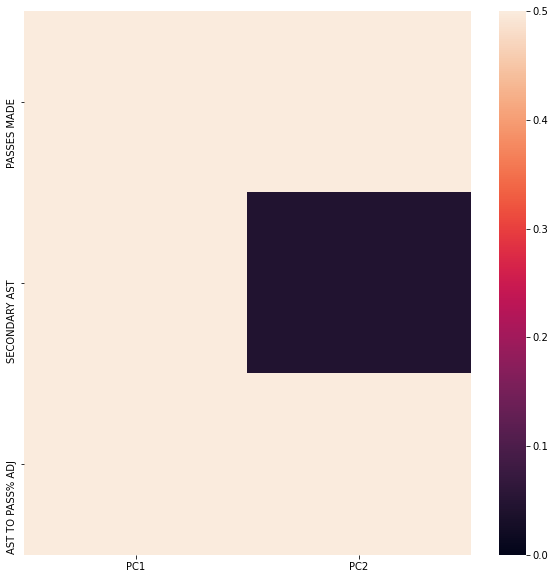

In [163]:
passing.Heatmap()

In [164]:
passing.PCA_sorted_eigen('PC1')

SECONDARY AST       0.636855
PASSES MADE         0.556206
AST TO PASS% ADJ    0.533902
Name: PC1, dtype: float64

In [165]:
passing.PCA_transform().nlargest(10, 'PC1')

,PC1,PC2,PLAYER,TEAM,POSITION
85,4.590007,-0.424210,Kyle Lowry,TOR,G
29,4.198304,0.176917,John Wall,WAS,G
15,3.996998,0.018452,Kyrie Irving,BOS,G
0,3.953771,0.584151,James Harden,HOU,G
110,3.909687,-0.602295,Ricky Rubio,UTA,G
18,3.861344,0.518924,Russell Westbrook,OKC,G
43,3.821250,-1.124900,Jamal Murray,DEN,G
11,3.802234,-0.740870,Kemba Walker,CHA,G
36,3.757056,0.073915,Trae Young,ATL,G
26,3.694737,-0.899844,Mike Conley,MEM,G


In [166]:
passing_df = pca_name_change(passing_df, 'passing')

# Merging

In [177]:
merged_pca = stats_df.merge(defense_df).merge(hustle_df).merge(shooting_df).merge(play_df).merge(passing_df)
merged_pca.shape

(388, 22)

&lt;AxesSubplot:&gt;

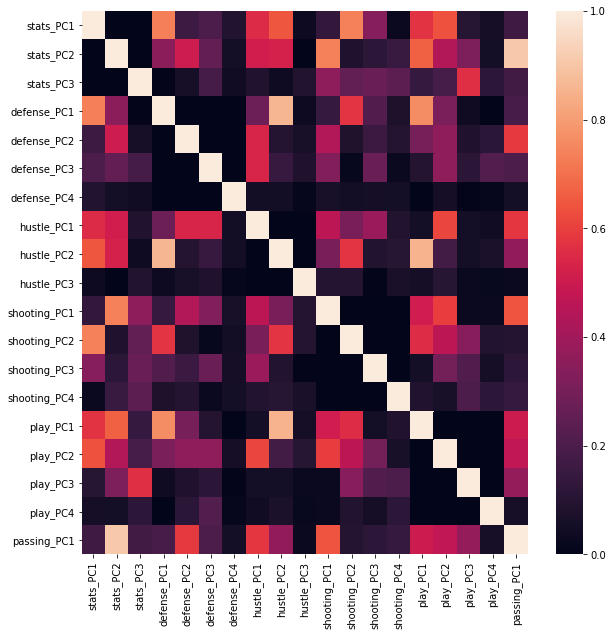

In [187]:
plt.figure(figsize = (10,10))
sns.heatmap(merged_pca.corr().abs(), vmax = 1, vmin = 0)

In [189]:
merged_pca.to_csv('PCA_data.csv', index = False)